# Experiment 2

## Problem Statement

Write a program to perform data pre-processing techniques for effective machine learning.

## Code

In [36]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Getting the Datasets

In [37]:
dataset_1_file_path = "dataset1.csv"
dataset_2_file_path = "dataset2.csv"

dataset_1 = pd.read_csv(dataset_1_file_path)
dataset_2 = pd.read_csv(dataset_2_file_path)

print("Dataset 1")
print(dataset_1.head().to_markdown())

print("\nDataset 2")

print("\nDataset 2")
print(dataset_2.head().to_markdown())

Dataset 1
|    |   common_id |   feature1 |   feature2 | feature3   |   feature4 |
|---:|------------:|-----------:|-----------:|:-----------|-----------:|
|  0 |           0 |    37.454  |   0.870471 | B          |        971 |
|  1 |           1 |    95.0714 |  -2.99007  | A          |        882 |
|  2 |           2 |    73.1994 |   0.917608 | B          |        470 |
|  3 |           3 |    59.8658 | -19.8757   | A          |        142 |
|  4 |           4 |    15.6019 |  -2.19672  | D          |         91 |

Dataset 2

Dataset 2
|    |   common_id |   feature5 | feature6   |   feature7 |   feature8 |
|---:|------------:|-----------:|:-----------|-----------:|-----------:|
|  0 |          50 |    6.00823 | F          |   -4.48618 |       1337 |
|  1 |          51 |   17.094   | H          |    7.62915 |       1012 |
|  2 |          52 |    4.58995 | E          |    1.83455 |       1144 |
|  3 |          53 |    4.70785 | E          |    1.04748 |        732 |
|  4 |          54 

Checking For Noise and Removing It (If Any)

In [38]:
# checking for missing values in both the datasets
print("Missing values in the dataset_1: ", dataset_1.isnull().sum().sum())
print("Missing values in the dataset_2: ", dataset_2.isnull().sum().sum())

Missing values in the dataset_1:  0
Missing values in the dataset_2:  0


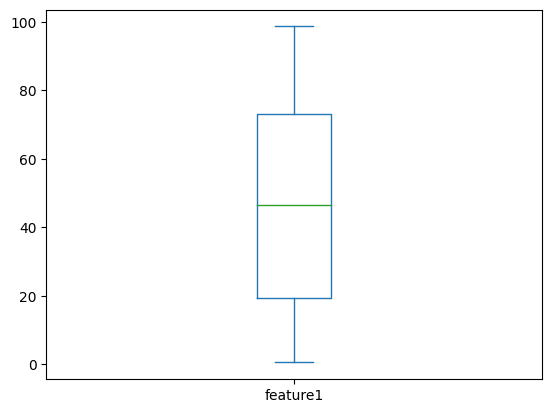

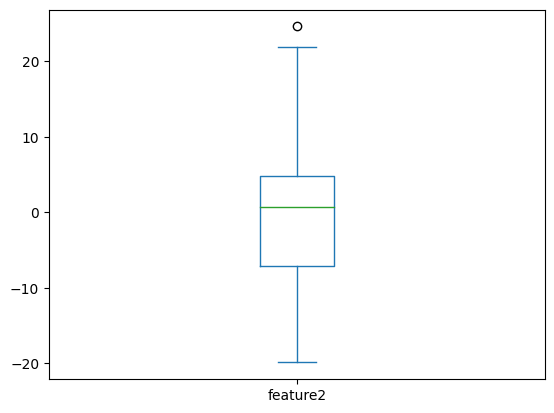

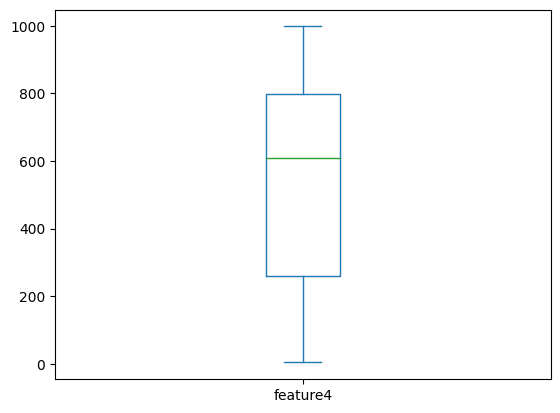

In [39]:
# plotting all the features in the dataset_1 to check the outliers

dataset_1['feature1'].plot(kind='box', layout=(5,5))
plt.show()
dataset_1['feature2'].plot(kind='box', layout=(5,5))
plt.show()
dataset_1['feature4'].plot(kind='box', layout=(5,5))
plt.show()

In [46]:
def replace_outliers_with_mean(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column_name].mean()
    df[column_name] = df.apply(
        lambda row: mean_value if (
            row[column_name] < lower_bound or row[column_name] > upper_bound) else row[column_name],
        axis=1
    )
    return df


# Handle outliers for dataset1 and dataset2
dataset1_cleaned = dataset_1.copy()
dataset2_cleaned = dataset_2.copy()
for column in ["feature1", "feature2", "feature4"]:
    dataset1_cleaned = replace_outliers_with_mean(dataset1_cleaned, column)
for column in ["feature5", "feature7", "feature8"]:
    dataset2_cleaned = replace_outliers_with_mean(dataset2_cleaned, column)

print("Dataset 1 Cleaned")
print(dataset1_cleaned.head().to_markdown())

print("\n")

print("Dataset 2 Cleaned")
print(dataset2_cleaned.head().to_markdown())


Dataset 1 Cleaned
|    |   common_id |   feature1 |   feature2 | feature3   |   feature4 |
|---:|------------:|-----------:|-----------:|:-----------|-----------:|
|  0 |           0 |    37.454  |   0.870471 | B          |        971 |
|  1 |           1 |    95.0714 |  -2.99007  | A          |        882 |
|  2 |           2 |    73.1994 |   0.917608 | B          |        470 |
|  3 |           3 |    59.8658 | -19.8757   | A          |        142 |
|  4 |           4 |    15.6019 |  -2.19672  | D          |         91 |


Dataset 2 Cleaned
|    |   common_id |   feature5 | feature6   |   feature7 |   feature8 |
|---:|------------:|-----------:|:-----------|-----------:|-----------:|
|  0 |          50 |    6.00823 | F          |   -4.48618 |       1337 |
|  1 |          51 |   17.094   | H          |    7.62915 |       1012 |
|  2 |          52 |    4.58995 | E          |    1.83455 |       1144 |
|  3 |          53 |    4.70785 | E          |    1.04748 |        732 |
|  4 |       

Normalizing Data

In [47]:
def normalize_column(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    return df

# Normalize numeric features for dataset1_cleaned and dataset2_cleaned
for column in ["feature1", "feature2", "feature4"]:
    dataset1_cleaned = normalize_column(dataset1_cleaned, column)
for column in ["feature5", "feature7", "feature8"]:
    dataset2_cleaned = normalize_column(dataset2_cleaned, column)

print("Dataset 1 After Normalization")
print(dataset1_cleaned.head().to_markdown())

print("\n")

print("Dataset 2 Cleaned After Normalization")
print(dataset2_cleaned.head().to_markdown())

Dataset 1 After Normalization
|    |   common_id |   feature1 |   feature2 | feature3   |   feature4 |
|---:|------------:|-----------:|-----------:|:-----------|-----------:|
|  0 |           0 |   0.376025 |   0.496554 | B          |  0.972837  |
|  1 |           1 |   0.96314  |   0.404153 | A          |  0.8833    |
|  2 |           2 |   0.740267 |   0.497682 | B          |  0.468813  |
|  3 |           3 |   0.604399 |   0        | A          |  0.138833  |
|  4 |           4 |   0.153354 |   0.423142 | D          |  0.0875252 |


Dataset 2 Cleaned After Normalization
|    |   common_id |   feature5 | feature6   |   feature7 |   feature8 |
|---:|------------:|-----------:|:-----------|-----------:|-----------:|
|  0 |          50 |  0.106932  | F          |   0.253226 |   0.850305 |
|  1 |          51 |  0.333027  | H          |   0.779775 |   0.519348 |
|  2 |          52 |  0.0780058 | E          |   0.527933 |   0.653768 |
|  3 |          53 |  0.0804103 | E          |   0.493

Integrating the Datasets

In [59]:
merged_dataset = pd.merge(dataset1_cleaned, dataset2_cleaned, on="common_id", how="inner")

print("Merged Dataset: ")
print(merged_dataset.head().to_markdown())

Merged Dataset: 
|    |   common_id |   feature1 |   feature2 | feature3   |   feature4 |   feature5 | feature6   |   feature7 |   feature8 |
|---:|------------:|-----------:|-----------:|:-----------|-----------:|-----------:|:-----------|-----------:|-----------:|
|  0 |          50 |   0.982369 |   0.238637 | A          |   0.634809 |  0.106932  | F          |   0.253226 |   0.850305 |
|  1 |          51 |   0.784225 |   0.340178 | B          |   0.10161  |  0.333027  | H          |   0.779775 |   0.519348 |
|  2 |          52 |   0.951712 |   0.499571 | C          |   0.669014 |  0.0780058 | E          |   0.527933 |   0.653768 |
|  3 |          53 |   0.906192 |   0.355214 | B          |   0.657948 |  0.0804103 | E          |   0.493727 |   0.234216 |
|  4 |          54 |   0.603627 |   0.104572 | B          |   0.655936 |  0.301959  | F          |   0.257936 |   0.53055  |


Perfroming Reduction on Merged Dataset

In [61]:
# Remove rows where feature3 is 'C' or 'D' 
reduced_data = merged_dataset[merged_dataset['feature3'].isin(['C', 'D'])]
print("Rows Where Feature3 is 'C' or 'D':")
print(reduced_data.head().to_markdown())

print("\n")

# Updating the merged dataset
merged_dataset = merged_dataset.drop(reduced_data.index)
print("Merged Dataset After Removing Rows Where Feature3 is 'C' or 'D':")
print(merged_dataset.head().to_markdown())

Rows Where Feature3 is 'C' or 'D':
| common_id   | feature1   | feature2   | feature3   | feature4   | feature5   | feature6   | feature7   | feature8   |
|-------------|------------|------------|------------|------------|------------|------------|------------|------------|


Merged Dataset After Removing Rows Where Feature3 is 'C' or 'D':
|    |   common_id |   feature1 |   feature2 | feature3   |   feature4 |   feature5 | feature6   |   feature7 |   feature8 |
|---:|------------:|-----------:|-----------:|:-----------|-----------:|-----------:|:-----------|-----------:|-----------:|
|  0 |          50 |   0.982369 |   0.238637 | A          |   0.634809 | 0.106932   | F          |   0.253226 |   0.850305 |
|  1 |          51 |   0.784225 |   0.340178 | B          |   0.10161  | 0.333027   | H          |   0.779775 |   0.519348 |
|  3 |          53 |   0.906192 |   0.355214 | B          |   0.657948 | 0.0804103  | E          |   0.493727 |   0.234216 |
|  4 |          54 |   0.603627 |